<a id='inicio'></a>
# Controles interativos com widgets no Jupyter Notebook
### 61º Encontro do PUG-PE (28/09)
http://pycon.pug.pe/LXI/

[**Karl Sousa**](https://github.com/karlvandesman)

## Resumo
Visualização de dados já é algo que pode nos trazer bastantes insights. No entanto, muitas vezes temos a tediosa e custosa tarefa de reescrever e reexecutar o código várias vezes para visualizá-los novamente. Para solucionar esse problema, podemos agregar à visualização uma forma de interação por widgets, tornando o processo mais dinâmico, mais fluido, deixando tempo livre para concentrarmos no que realmente interessa.
Usando o Jupyter notebook, irei mostrar algumas formas de interação bastante interessantes, onde se pode variar gráficos para entender melhor conceitos, e otimizar a forma de visualização.

**Público-alvo** <br>
Pessoas com nível iniciante/intermediário em python com interesse em visualização e análise de dados.

<a id='sumario'></a>
## Sumário

- [Resumo](#resumo)
- [Importando bibliotecas](#importando_bibliotecas)
- [ipywidgets](#ipywidgets)
- [Tipos de widgets](#tipos_widgets)
- [Customização de widgets](#customizacao_widgets)
- [Aplicação em análise de dados](#analise_dados)
- [Plotagem de gráficos interativos](#plotagem)
- [Referências](#referencias)

In [62]:
# Instalação
#!pip install ipywidgets
#!jupyter nbextension enable --py widgetsnbextension

<a id='importando_bibliotecas'></a>
## Importando as bibliotecas
⬆️ [Anterior](#sumario)   |   [Próximo](#ipywidgets) ⬇️

In [229]:
# Bibliotecas básicas
import numpy as np
import pandas as pd
from scipy.stats import norm
import matplotlib.pyplot as plt
import os

# Bibliotecas especiais :)
import ipywidgets as widgets
from ipywidgets import interact
from IPython.display import display

<a id='ipywidgets'></a>
## ipywidgets
Mas o que são widgets?
Ouvimos muito falar de widgets nos celulares, onde vemos aquelas caixinhas pra interação. 

São componentes gráficos de interface que nos vão auxiliar ou facilitar em alguma tarefa maior. E claro, aí vamos ter widgets bem variados, podem ser botões, slider (aquelas caixinhas deslizantes), uma caixa de texto, até alguns mais complexos, onde você pode selecionar datas em um calendário.

Então para a aplicação no jupyter, estaremos utilizando o **ipywidgets**. Como falei, existem vários tipos que podem ser criados, mas vamos olhando de pouco em pouco para ver algumas propriedades, e depois aumentando um pouco a complexidade.

<a id='tipos_widgets'></a>
## Tipos de widgets
- Numeric widgets
    - Slider
        - IntSlider
        - FloatSlider
        - FloatLogSlider
        - IntRangeSlider
        - FloatRangeSlider
    - Progress
        - IntProgress
        - FloatProgress
    - Text
        - IntText
        - FloatText
        - BoundedIntText
        - BoundedFloatText
- Boolean widgets
    - ToggleButton
    - Checkbox
    - Valid (read-only)
- Selection widgets
    - Dropdown
    - RadioButtons
    - Select
    - SelectionSlider
    - SelectionRangeSlider
    - ToggleButtons
    - SelectMultiple
- String widgets
    - Text
    - Textarea
    - Label
    - HTML
    - HTML Math
- Image
- Button
- Output
- Play (Animation) widget
- Date Picker
- Color picker
- File Upload
- Controller
- Container/Layout widgets

[comment]: <> (Então vamos primeiro criar um widget do tipo slider para inteiros. Rodando somente essa linha de código ele já vai ser mostrado.)

In [261]:
widgets.IntSlider()

IntSlider(value=0)

[comment]: <> (Apesar do ipywidgets já ter uma forma de visualização, de apresentação do widget, ele é um pouco limitado, e por exemplo, não poderíamos mostrar múltiplos widgets de uma só vez. Para isso, podemos usar a função display da biblioteca que importamos.)

In [265]:
wdgInt = widgets.IntSlider()
wdgFloat = widgets.FloatSlider()

#wdgInt
#wdgFloat

display(wdgInt)
display(wdgFloat)

IntSlider(value=0)

FloatSlider(value=0.0)

[comment]: <> (As vezes precisamos de widgets que precisam controlar a mesma variável. Poderíamos fazer então um widget pra texto e outro deslizante, slider)

In [272]:
wdgTexto = widgets.FloatText()
wdgFloat = widgets.FloatSlider(readout_format='.4f')

display(wdgTexto, wdgFloat)

widgets.link((wdgTexto, 'value'), (wdgFloat, 'value'));
#wdgLink.unlink()

FloatText(value=0.0)

FloatSlider(value=0.0, readout_format='.4f')

[comment]: <> (Aqui vamos explorar os atributos de um slider numérico float, e vemos que existem várias opções de modificação)

<a id='customizacao_widgets'></a>
## Customização de widgets
⬆️ [Anterior](#tipos_widgets)   |   [Próximo](#analise_dados) ⬇️

In [283]:
widgets.FloatSlider(
    value=7.5,
    min=5,
    max=10.0,
    step=0.05,
    description='Vertical',
    disabled=False,
    continuous_update=False,
    orientation='vertical',
    readout=True,
    readout_format='.4f'
)

FloatSlider(value=7.5, continuous_update=False, description='Vertical', max=10.0, min=5.0, orientation='vertic…

In [21]:
wdg = widgets.FloatSlider()
wdg.keys

['_dom_classes',
 '_model_module',
 '_model_module_version',
 '_model_name',
 '_view_count',
 '_view_module',
 '_view_module_version',
 '_view_name',
 'continuous_update',
 'description',
 'description_tooltip',
 'disabled',
 'layout',
 'max',
 'min',
 'orientation',
 'readout',
 'readout_format',
 'step',
 'style',
 'value']

<a id='analise_dados'></a>
## Aplicação em análise de dados
⬆️ [Anterior](#customizacao_widgets)   |   [Próximo](#plotagem) ⬇️

In [295]:
df1 = pd.read_csv('BRAZIL_CITIES.csv', sep=';', index_col=0)

df1.head(5)

,STATE,CAPITAL,IBGE_RES_POP,IBGE_RES_POP_BRAS,IBGE_RES_POP_ESTR,IBGE_DU,IBGE_DU_URBAN,IBGE_DU_RURAL,IBGE_POP,IBGE_1,...,Pu_Bank,Pr_Assets,Pu_Assets,Cars,Motorcycles,Wheeled_tractor,UBER,MAC,WAL-MART,POST_OFFICES
CITY,,,,,,,,,,,,,,,,,,,,,
Abadia De Goiás,GO,0,6876.0,6876.0,0.0,2137.0,1546.0,591.0,5300.0,69.0,...,NaN,NaN,NaN,2158.0,1246.0,0.0,NaN,NaN,NaN,1.0
Abadia Dos Dourados,MG,0,6704.0,6704.0,0.0,2328.0,1481.0,847.0,4154.0,38.0,...,NaN,NaN,NaN,2227.0,1142.0,0.0,NaN,NaN,NaN,1.0
Abadiânia,GO,0,15757.0,15609.0,148.0,4655.0,3233.0,1422.0,10656.0,139.0,...,1.0,33724584.0,67091904.0,2838.0,1426.0,0.0,NaN,NaN,NaN,3.0
Abaeté,MG,0,22690.0,22690.0,0.0,7694.0,6667.0,1027.0,18464.0,176.0,...,2.0,44974716.0,371922572.0,6928.0,2953.0,0.0,NaN,NaN,NaN,4.0
Abaetetuba,PA,0,141100.0,141040.0,60.0,31061.0,19057.0,12004.0,82956.0,1354.0,...,4.0,76181384.0,800078483.0,5277.0,25661.0,0.0,NaN,NaN,NaN,2.0


In [318]:
a = os.listdir("./")
result = [ file for file in a if file.endswith('.csv') ]

@interact
def abrir_csv(nome_csv=widgets.Dropdown(options=result, description='Arquivo csv'), 
              sep=widgets.Dropdown(options=[';', ',', '\t'], description='Separador'),
             indice_colunas=widgets.IntText(description='Índice coluna')):
    a = pd.read_csv(nome_csv, sep, index_col=indice_colunas)
    return a

interactive(children=(Dropdown(description='Arquivo csv', options=('Data_Dictionary.csv', 'BRAZIL_CITIES.csv',…

ValueError: Invalid file path or buffer object type: <class 'ipywidgets.widgets.widget_selection.Dropdown'>

In [332]:
df = pd.read_csv('BRAZIL_CITIES.csv', sep=';', index_col=0)

print('Dimensões de df:', df.shape)

df_numerico = df._get_numeric_data()

nomes_colunas = df_numerico.columns

@interact
def show_column(Coluna=nomes_colunas, limite=widgets.FloatText(description='>=', readtout=True)):
    return df.loc[df_numerico[Coluna] >= limite]

Dimensões de df: (5573, 80)


interactive(children=(Dropdown(description='Coluna', options=('CAPITAL', 'IBGE_RES_POP', 'IBGE_RES_POP_BRAS', …

<a id='plotagem'></a>
## Plotagem de gráficos interativos
⬆️ [Anterior](#analise_dados)   |   [Próximo](#exemplos_avancados) ⬇️

In [342]:
def graf_dispersao(x, y):
    plt.scatter(df[x].values, df[y].values)
    plt.xlabel(x)
    plt.ylabel(y)
    plt.show

widgets.interactive(graf_dispersao, x=widgets.Dropdown(options=nomes_colunas, description='Eixo X'),
                   y=widgets.Dropdown(options=nomes_colunas, description='Eixo Y'))

interactive(children=(Dropdown(description='Eixo X', options=('CAPITAL', 'IBGE_RES_POP', 'IBGE_RES_POP_BRAS', …

In [343]:
# Parâmetros das figuras para o matplotlib

plt.rcParams['figure.figsize'] = (6, 4)
plt.rcParams['figure.dpi'] = 150

# Habilita o uso de figuras interativas
%matplotlib inline

In [347]:
def f(a):
    plt.plot(np.arange(-10, 11), a*np.arange(-10, 11), label='f(x)=%dx'%a)
    #plt.plot(np.arange(-10, 11), np.arange(-10, 11), color='red')
    plt.legend(loc='best')
    plt.ylim(-10, 10)
    plt.xlim(-10, 10)
    plt.axhline(y=0, color='k', alpha=0.1)
    plt.axvline(x=0, color='k', alpha=0.1)

#f(7)
widgets.interact(f, a=7);

interactive(children=(IntSlider(value=7, description='a', max=21, min=-7), Output()), _dom_classes=('widget-in…

[comment]: <> (Agora para a plotagem de gráficos vamos começar com uma função básica linear. Por meio de um único parâmetro, a declividade, vamos atualizar esse valor e a plotagem é feita de maneira automática.)

Aqui a gente vê que quando se usa o interact(), ele automaticamente detecta o tipo do parâmetro que estamos usando, e define um widget apropriado.

In [241]:
def f(a):
    fig, ax = plt.subplots(1, figsize=(10, 4))
    x = np.arange(-10, 10)
    ax.plot(x, x*a)
    ax.set_xlim(x[0], x[-1])
    ax.set_ylim(-10, 10)
    ax.grid()

#f(1)
widgets.interact(f, a=(-10, 10, 0.5));

interactive(children=(FloatSlider(value=0.0, description='a', max=10.0, min=-10.0, step=0.5), Output()), _dom_…

In [352]:
%matplotlib nbagg
plt.rcParams.update({'font.size': 6})
plt.rcParams['figure.figsize'] = (3, 2)

<IPython.core.display.Javascript object>


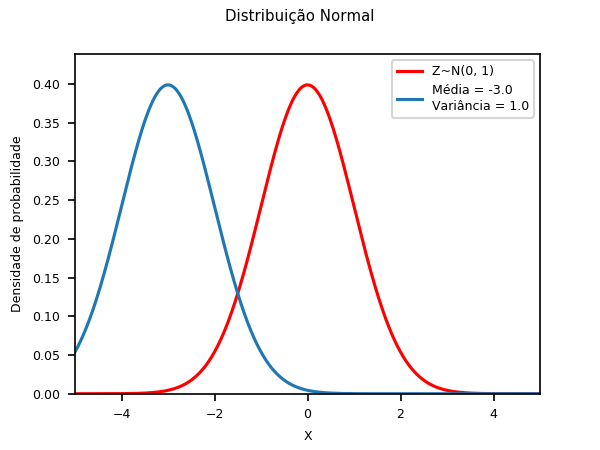

interactive(children=(BoundedFloatText(value=0.0, description='Média', max=20.0, min=-20.0), BoundedFloatText(…

In [353]:
# OBS.: Não pode usar print depois do plot da imagem

# Parâmetros de uma distribuição normal
media = 0
variancia = 1
    
fig, ax = plt.subplots(figsize=(4, 3))
plt.suptitle('Distribuição Normal')

def update_plot(media, variancia):
    ax.clear()
    
    sigma = np.sqrt(variancia)
    # x 'padrão'
    x = np.linspace(-5, 5, 1000)
    y = norm.pdf(x, media, sigma)
    z = norm.pdf(x, 0, 1)
    
    plt.plot(x, z, color='red', label='Z~N(0, 1)')
    
    units = 'Média = {}\nVariância = {}'
    ax.plot(x, y, label=units.format(media, variancia))
    ax.legend(loc='upper right')
    ax.set_xlabel('X')
    ax.set_ylabel('Densidade de probabilidade')
    ax.set_xlim(x[0], x[-1])
    ax.set_ylim(min(min(y), min(z))*1.1, max(max(y), max(z))*1.1)
    plt.show

mediaSlider = widgets.FloatSlider(min=-20, max=20, value=0, description='Média')
mediaText = widgets.BoundedFloatText(min=-20, max=20, value=0, description='Média')

varSlider = widgets.FloatSlider(min=0.0001, max=10, value=1, description='Variância')
varText = widgets.BoundedFloatText(min=0.0001, max=10, value=1, description='Variância')

widgets.interactive(update_plot, media=mediaText, variancia=varText)

<a id='exemplos_avancados'></a>
## Exemplos mais avançados

Exemplos de bibliotecas mais avançadas, em que se tem mais liberdade de customização, baseadas no ipywidgets:

- [bqplot](https://github.com/bloomberg/bqplot) biblioteca de visualização de dados em 2D que permite customizações; 
- [pythreejs](https://github.com/jupyter-widgets/pythreejs);
- [ipyleaflet](https://github.com/jupyter-widgets/ipyleaflet).

<a id='referencias'></a>
## Referências
[Sumário](#sumario) <br>

- [IPyWidgets User Guide](https://ipywidgets.readthedocs.io/en/latest/user_guide.html)
- [Interactive Controls in Jupyter Notebook](https://towardsdatascience.com/interactive-controls-for-jupyter-notebooks-f5c94829aee6)
- [Learn Jupyter Notebooks (pt.4) Using Interactive Widgets](https://www.youtube.com/watch?v=SN0Bflf14C4)